# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


In [3]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [4]:
#working on Question 1
#importing required pakages:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
#set to seaborn default:
sns.set()

Text(0,0.5,'temp')

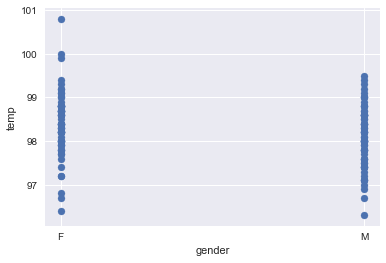

In [5]:
plt.scatter(df['gender'], df['temperature'])
plt.xlabel('gender')
plt.ylabel('temp')

Text(0,0.5,'pdf')

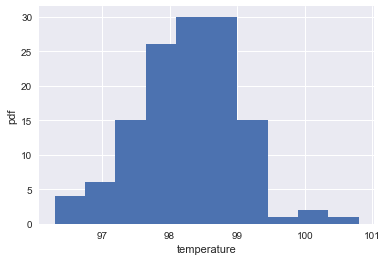

In [6]:
#explore the data in graphical visualization:
plt.hist(df['temperature'])
plt.xlabel('temperature')
plt.ylabel('pdf')

In [7]:
#compute the mean and standard deviation of the temperatues:
mean= np.mean(df['temperature'])
mean

98.24923076923078

In [8]:
#compute the standard deviation of the temperatues:
std= np.std(df['temperature'])
std

0.7303577789050377

In [9]:
#compute the samples of the temperatures:
samples= np.random.normal(mean, std, size=100000)

In [10]:
#write the function for ECDF:
def ecdf(data):
    #number of data points n:
    n=len(data)
    #x-axis data points:
    x= np.sort(data)
    #y-axis data points:
    y=np.arange(1, n+1)/n
    return x, y

In [11]:
#compute the ECDF for the original data and for the theoretical sample:
x,y= ecdf(df['temperature'])
x_theo, y_theo= ecdf(samples)

Text(0,0.5,'CDF')

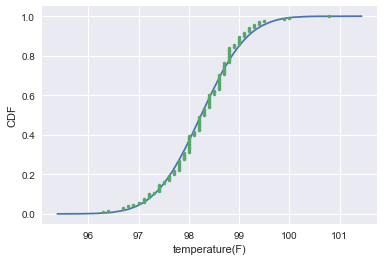

In [12]:
#check the normality of the temperature with plots:
plt.plot(x_theo, y_theo)
plt.plot(x, y, marker='.', linestyle='none')
plt.xlabel('temperature(F)')
plt.ylabel('CDF')

#Question 2
Yes, the sample size greater than 30 is considered large. Also, the observations are independent.
Since the normal temperature of a human body is not a rare event. small sample size would be sufficient. Also, the observations are independent.

In [13]:
#working on question 3(i)
#generating bootstrap replicate:
def bs_replicate_1d(data, func):
    #compute bootstrap sample:
    bs_sample= np.random.choice(data, size=len(data))
    return func(bs_sample)

In [14]:
#generating many bootstrap replicate:
def draw_bs_reps(data, func, size=1):
    """draw bootstrap replicates"""
    #initialize an array:
    bs_replicates=np.empty(size)
    #bootstrap replicate func using for loop:
    for i in range(size):
        bs_replicates[i]= bs_replicate_1d(data, func)
    return bs_replicates    

In [15]:
temp_replicates= draw_bs_reps(df['temperature'], np.mean, size=10000)

Text(0,0.5,'count')

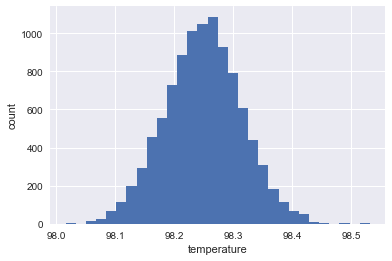

In [16]:
plt.hist(temp_replicates, bins=30)
plt.xlabel('temperature')
plt.ylabel('count')

In [17]:
#compute the 95% confidence interval
np.percentile(temp_replicates, [2.5,97.5])

array([98.12153846, 98.37692308])

In [18]:
#Bootstrap hypothysis test:
wunderlich_value= 98.6
df_shifted= df['temperature'] - np.mean(df['temperature']) + wunderlich_value

In [19]:
x, y= ecdf(df_shifted)
x_df, y_df= ecdf(df['temperature'])

Text(0,0.5,'ecdf')

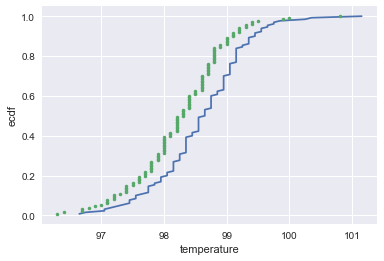

In [20]:
plt.plot(x, y)
plt.plot(x_df, y_df, marker='.', linestyle='none')
plt.xlabel('temperature')
plt.ylabel('ecdf')

In [21]:
#working on question 3(ii)
def diff_from_wunderlich(data, wunderlich_value=98.6):
    return np.mean(data)-wunderlich_value

In [22]:
diff_observed= diff_from_wunderlich(df['temperature'])
diff_observed

-0.35076923076921673

In [23]:
temp_replicates_shifted= draw_bs_reps(df_shifted, diff_from_wunderlich, size=10000)

In [24]:
p= np.sum(temp_replicates_shifted <= diff_observed)/10000
p

0.0

In [25]:
#working on question 3(iii)
#T-test Statistic
t_sample= np.random.choice(df['temperature'], size=130)
stats.ttest_1samp(t_sample, 98.6)

Ttest_1sampResult(statistic=-6.499274795025377, pvalue=1.6052660147103699e-09)

In [26]:
#working on question 4:
small_sample= np.random.choice(df['temperature'], size=10)
stats.ttest_1samp(small_sample, 98.6)

Ttest_1sampResult(statistic=-2.3200808433365507, pvalue=0.045479788036484906)

In [27]:
#working on question 5:


In [28]:
male_temp=df['temperature'][df['gender']=='M']
female_temp=df['temperature'][df['gender']=='F']